# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Import Data

In [2]:
# Show charts within notebook
%matplotlib inline

In [3]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Achievement 6'

In [4]:
# Import trips_merged_cleaned2.csv
df_trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_wrangled_no_outliers2.csv'), index_col = False)

# 03. Explore Data

In [5]:
# View first 5 rows for df_trips
df_trips.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,weekday_stoptime,month_name_starttime,month_name_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours,tripduration_buckets
0,0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,...,Wednesday,January,January,0,0,36,25629,3.766667,0.062778,10 minutes or less
1,1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,...,Wednesday,January,January,0,0,31,25629,6.283333,0.104722,10 minutes or less
2,2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,...,Wednesday,January,January,0,0,31,25629,4.800000,0.080000,10 minutes or less
3,3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,...,Wednesday,January,January,0,0,51,15767,7.250000,0.120833,10 minutes or less
4,4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,...,Wednesday,January,January,0,0,37,25629,3.850000,0.064167,10 minutes or less


In [6]:
# Drop 'Unnamed: 0' column
df_trips.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
df_trips.shape

(379861, 32)

In [8]:
df_trips.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'day_of_month_starttime', 'month_starttime',
       'year_starttime', 'day_of_month_stoptime', 'month_stoptime',
       'year_stoptime', 'weekday_starttime', 'weekday_stoptime',
       'month_name_starttime', 'month_name_stoptime', 'hour_starttime',
       'hour_stoptime', 'customer_age', 'starttime_counts',
       'tripduration_minutes', 'tripduration_hours', 'tripduration_buckets'],
      dtype='object')

In [9]:
df_trips.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,day_of_month_starttime,...,year_starttime,day_of_month_stoptime,month_stoptime,year_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours
count,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,...,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000,379861.000000
mean,1226.015948,3304.053222,40.722255,-74.046816,3302.678248,40.721792,-74.046022,40731.378309,1980.031030,15.737114,...,2020.148765,15.738991,6.132717,2020.148775,14.539782,14.689505,40.117735,11579.704184,20.433599,0.340560
std,2708.898457,184.555125,0.007361,0.011912,190.013195,0.093728,0.170317,6162.534657,11.011137,8.709838,...,0.355857,8.710478,3.184978,0.355867,5.048504,5.179696,11.113176,6657.892034,45.148308,0.752472
min,61.000000,3184.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1920.000000,1.000000,...,2020.000000,1.000000,1.000000,2020.000000,0.000000,0.000000,16.000000,1.000000,1.016667,0.016944
25%,322.000000,3195.000000,40.716870,-74.051789,3195.000000,40.716870,-74.050656,42124.000000,1970.000000,8.000000,...,2020.000000,8.000000,3.000000,2020.000000,11.000000,11.000000,31.000000,6035.000000,5.366667,0.089444
50%,600.000000,3209.000000,40.721124,-74.043991,3209.000000,40.721124,-74.043845,42376.000000,1982.000000,16.000000,...,2020.000000,16.000000,6.000000,2020.000000,15.000000,16.000000,38.000000,10489.000000,10.000000,0.166667
75%,1366.000000,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.037683,44228.000000,1989.000000,23.000000,...,2020.000000,23.000000,9.000000,2020.000000,18.000000,19.000000,51.000000,15767.000000,22.766667,0.379444
max,86392.000000,3792.000000,40.748716,-74.032108,4282.000000,40.848282,0.000000,55298.000000,2004.000000,31.000000,...,2021.000000,31.000000,12.000000,2021.000000,23.000000,23.000000,100.000000,25629.000000,1439.866667,23.997778


In [10]:
df_trips.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
day_of_month_starttime     0
month_starttime            0
year_starttime             0
day_of_month_stoptime      0
month_stoptime             0
year_stoptime              0
weekday_starttime          0
weekday_stoptime           0
month_name_starttime       0
month_name_stoptime        0
hour_starttime             0
hour_stoptime              0
customer_age               0
starttime_counts           0
tripduration_minutes       0
tripduration_hours         0
tripduration_buckets       0
dtype: int64

#### Observations: Data is as expected.

# 04. Data Preparation for Regression Analysis

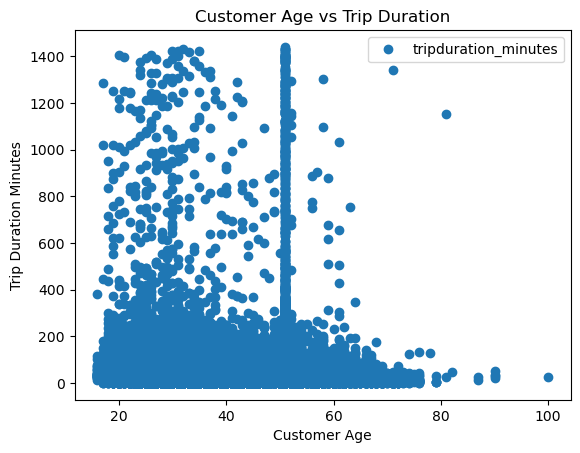

In [11]:
# Create scatterplot for 'customer_age' and 'tripduration_minutes'
df_trips.plot(x = 'customer_age', y='tripduration_minutes',style='o') 
plt.title('Customer Age vs Trip Duration')  
plt.xlabel('Customer Age')  
plt.ylabel('Trip Duration Minutes')  
plt.show()

#### Hypothesis: Customers aged 60 and younger take longer trips.

In [12]:
# Reshape variables into Numpy arrays and put into separate objects
X = df_trips['customer_age'].values.reshape(-1,1)
y = df_trips['tripduration_minutes'].values.reshape(-1,1)

In [13]:
# View array for independent variable
X

array([[36],
       [31],
       [31],
       ...,
       [51],
       [51],
       [51]], dtype=int64)

In [14]:
# View array for dependent variable
y

array([[ 3.76666667],
       [ 6.28333333],
       [ 4.8       ],
       ...,
       [14.61666667],
       [ 2.88333333],
       [ 2.9       ]])

In [15]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [16]:
# Create regression object
regression = LinearRegression()

In [17]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict values of y using X
y_predicted = regression.predict(X_test)

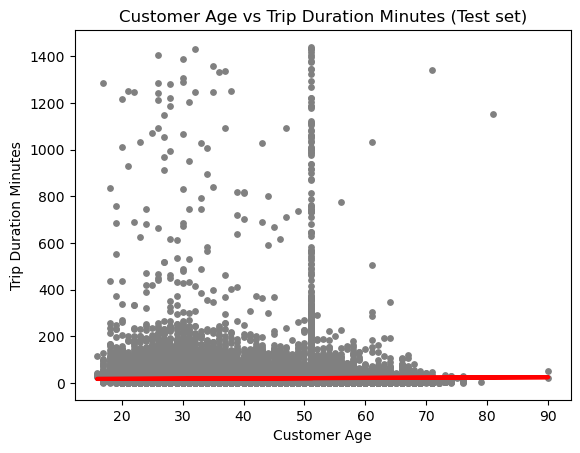

In [19]:
# Create Plot that shows regression line from model on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Customer Age vs Trip Duration Minutes (Test set)')
plot_test.xlabel('Customer Age')
plot_test.ylabel('Trip Duration Minutes')
plot_test.show()

#### Observations: The regression line is horizontal, which means that there is no relationship between the variables 'Customer Age' and 'Trip Duration'.

In [20]:
# Create objects containing model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # Mean Squared Error (MSE)
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [21]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10000638]]
Mean squared error:  1978.484437942943
R2 score:  0.0006457543481072081


#### Observations: Statistics confirm lack of a relationship between 'Customer Age' and 'Trip Duration'.

In [22]:
# View array for y_predicted
y_predicted

array([[21.57486036],
       [19.37471991],
       [20.27477737],
       ...,
       [18.37465607],
       [21.57486036],
       [19.57473268]])

In [23]:
# Create a dataframe comparing actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.150000,21.574860
1,11.750000,19.374720
2,6.750000,20.274777
3,16.566667,20.874816
4,5.733333,21.574860
5,9.533333,21.574860
6,3.083333,20.974822
7,29.266667,19.074701
8,9.083333,21.574860
9,1.400000,21.574860


#### Observations: The model performed very poorly on the test set. For the 'customer_age' variable, there are many more records for age 51 than any other age. I don't know why this is the case. One possibility would be that any null or missing values in the age column were replaced with 51. It would be interesting to see a regression if age 51 was excluded from the data set. See sections 07-09 of this script. 

# 06. Compare how Regression fits Training Set

In [24]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
# Create objects containing summary statistics
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
# Print summary statistics
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10000638]]
Mean squared error:  2062.2318698418167
R2 score:  0.0005998546107570668


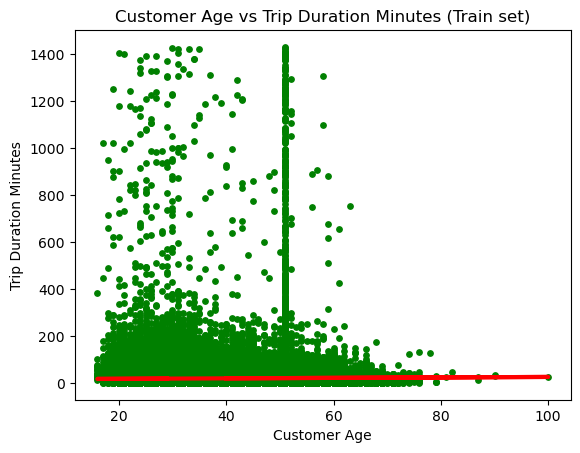

In [27]:
# Visualizing training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Customer Age vs Trip Duration Minutes (Train set)')
plot_test.xlabel('Customer Age')
plot_test.ylabel('Trip Duration Minutes')
plot_test.show()

# 07. Data Preparation for Regression Analysis without Age 51

In [28]:
# Exclude records with age 51
df_trips2 = df_trips.loc[df_trips['customer_age'] != 51]

In [29]:
# Ensure that records were excluded
df_trips2.loc[df_trips2['customer_age'] == 51]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,weekday_stoptime,month_name_starttime,month_name_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours,tripduration_buckets


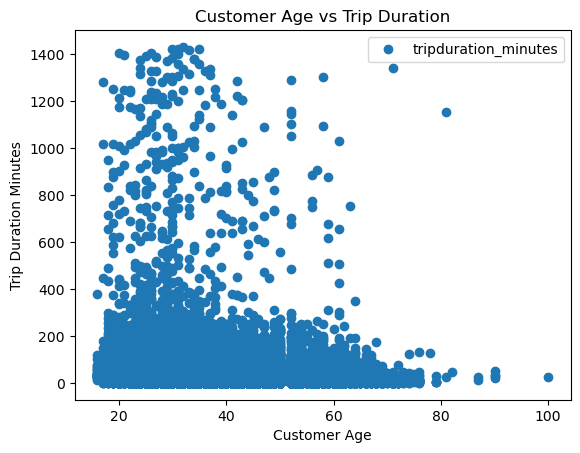

In [30]:
# Create scatterplot for 'customer_age' and 'tripduration_minutes'
df_trips2.plot(x = 'customer_age', y='tripduration_minutes',style='o') 
plt.title('Customer Age vs Trip Duration')  
plt.xlabel('Customer Age')  
plt.ylabel('Trip Duration Minutes')  
plt.show()

In [31]:
# Reshape variables into Numpy arrays and put into separate objects
X2 = df_trips2['customer_age'].values.reshape(-1,1)
y2 = df_trips2['tripduration_minutes'].values.reshape(-1,1)

In [32]:
# View array for independent variable
X2

array([[36],
       [31],
       [31],
       ...,
       [41],
       [63],
       [63]], dtype=int64)

In [33]:
# View array for dependent variable
y2

array([[ 3.76666667],
       [ 6.28333333],
       [ 4.8       ],
       ...,
       [17.81666667],
       [22.18333333],
       [ 2.66666667]])

In [34]:
# Split data into train set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 08. Regression Analysis without Age 51

In [35]:
# Create regression object
regression2 = LinearRegression()

In [36]:
# Fit regression object onto training set
regression2.fit(X2_train, y2_train)

LinearRegression()

In [37]:
# Predict values of y2 using X2
y2_predicted = regression2.predict(X2_test)

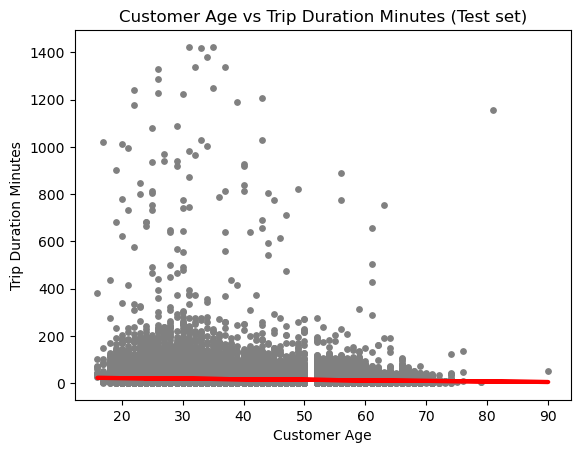

In [38]:
# Create Plot that shows regression line from model on test set
plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Customer Age vs Trip Duration Minutes (Test set)')
plot_test2.xlabel('Customer Age')
plot_test2.ylabel('Trip Duration Minutes')
plot_test2.show()

In [39]:
# Create objects containing model summary statistics
rmse2 = mean_squared_error(y2_test, y2_predicted) # Mean Squared Error (MSE)
r22 = r2_score(y2_test, y2_predicted) # R2 score. 

In [40]:
# Print model summary statistics
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[-0.23649753]]
Mean squared error:  1256.705680415607
R2 score:  0.004126811839904043


In [41]:
# View array for y2_predicted
y2_predicted

array([[20.47313857],
       [15.97968545],
       [19.29065091],
       ...,
       [18.10816324],
       [15.97968545],
       [11.01323726]])

In [42]:
# Create a dataframe comparing actual and predicted values of y.
data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,6.166667,20.473139
1,2.716667,15.979685
2,8.100000,19.290651
3,2.516667,18.581158
4,35.983333,11.722730
5,24.883333,19.290651
6,3.966667,15.270193
7,10.116667,20.236641
8,5.083333,16.689178
9,5.550000,17.398671


#### Observations: The model performance is still very poor when age 51 is excluded. 

# 09. Compare how Regression fits Training Set without Age 51

In [43]:
# Predict
y2_predicted_train = regression2.predict(X2_train) # This is predicting X_train!

In [44]:
# Create objects containing summary statistics
rmse2 = mean_squared_error(y2_train, y2_predicted_train)
r22 = r2_score(y2_train, y2_predicted_train)

In [45]:
# Print summary statistics
print('Slope:', regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[-0.23649753]]
Mean squared error:  1392.5717621249817
R2 score:  0.0045288721988169245


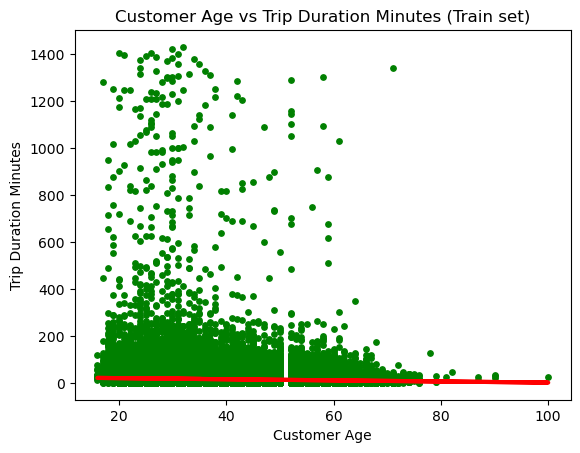

In [46]:
# Visualizing training set results.

plot_test2 = plt
plot_test2.scatter(X2_train, y2_train, color='green', s = 15)
plot_test2.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test2.title('Customer Age vs Trip Duration Minutes (Train set)')
plot_test2.xlabel('Customer Age')
plot_test2.ylabel('Trip Duration Minutes')
plot_test2.show()